# Resource Matching Optimization with FTE Requirements and Hiring Budget 

## Motivation 

### Introduction to Resource Management

A professional service organization provides an extensive range of services, for example

- Information technology outsourcing ,
- Business process outsourcing, 
- Accounting, 
- Legal, 
- Advertising, 
- Other specialized services.

Professional service organizations tend to operate globally and must coordinate projects across organizational and geographic boundaries. These projects are characterized by a high degree of service customization, flexible processes, and high labor intensity. Professional service organizations tend to have a diverse workforce consisting of their own internal resources, contingent resources, and other partners. Large professional services companies employ thousands of professionals to deliver a wide variety of services, making labor the industry’s highest expense.

A pipeline of projects at different stages of approval need to be staffed with a myriad of heterogeneous labor resources. With the standard work-breakdown-structure approach in project management, a project can be decomposed into sub-projects or jobs at an arbitrary level of granularity. A resource manager must consider multiple attributes measuring the quality of matching project jobs and “White-Collar” personnel. To list a few, business domain refers to the application area of a project or a resource’s area of expertise, for example, manufacturing, aerospace, oil and gas, and telecommunications. Skill type represents a particular skill or technology, e.g., dot net, Java, SAP, etc. Job level defines a resource’s expertise level ⁠— such as entry, intermediate and expert levels⁠ — which often corresponds with the efficiency or productivity, and pay grade of the resource, thus the cost of assigning the resource to a project. Location identifies a resource’s geographical location as well as whether the job needs to be performed onsite or offshore, which may incur different deployment cost. One may also consider workforce type which differentiates the source of a resource: regular/internal workforce or contingent workforce with different cost. In addition, a feasible plan requires that the available capacity of a resource cannot be exceeded.

### Limitations of Resource Management Tools and Processes

Current labor resources management processes and tools present the following limitations:

- Projects staffing is done in a decentralized way. That is, a resource manager can look only at the resource requirements and search supply in a specific business domain, with little or no communication between other domains of service.
- There is uncertainty in the availability of both resources and jobs. Projects at early stages of the approval process are often perceived as “project opportunities” with their availability, and the availability of the jobs associated with those projects, pending upon bidding process and outcome. A resource’s availability may also be uncertain due to attrition or unexpected disruption. Disruption may be caused by sick leave, vacation, reassignment, relocation or change of role.
- Manual allocation of project positions (jobs) to resources are done by queries where positions are satisfied on First-In/First-filled bases.
- The un-matched project positions remain un-matched unless a resource manager manually searches for resources to fill the positions.
- These limitations lead to:
    + Poor demand fulfillment and low labor resource utilization.
    + High project delivery costs.
    + Poor customer satisfaction.

### Resource Management Goals

The main goals of resource management are:

- Increase labor resources utilization.
- Reduce overall labor costs.
- Optimize the matching of job requirements with employees' qualifications.

The fundamental problem of resource management is to provide workforce resources:

- With the right skills and capabilities.
- For the right job.
- At the right time, location, and cost.

## Problem Description
Consider a professional service organization that has an important project to staff. This project has a set  of jobs that need to be filled by qualified labor resources. Each job needs a given amount  of qualified resources and a set of requirements defined by technology (skill and capabilities), role, job level, etc. Similarly, each resource has qualifications defined in terms of  technology (skill and capabilities), role, and job level. Also, the resource has a capacity available to fill a job.

The amount of resource required by a job is defined in FTE (Full Time Equivalent) units, and measures the amount of effort required to perform a job. 

A matching score for resources and jobs is calculated based on how well the qualifications of a resource matches the requirements of a job, in terms of technology (skill and capabilities), role, job level, etc.

If the capacity of a resource is not completely allocated, the remaining capacity not allocated is declared as idle capacity.   

In addition, if not enough internal resources are available, new resources can be hired. There is a fixed cost of hiring one resource of each type of job. Finally, there is a hiring budget that limits the number of new resources that can be hired. Also, jobs can have different priorities. This job priority is a factor that needs to be considered when deciding for which jobs we need to hire new resources, whenever there is not enough budget limiting the number of new resources we can hire. For the jobs that we could not hire a resource, a gap is declared.

The goal is to find an allocation of resources to jobs that maximizes the total matching score of resources and jobs, while satisfying jobs’ FTE requirements,  resources' capacity constraints, and budget for hiring.

## Model Formulation

Mathematical programming is a declarative approach where the modeler formulates a mathematical optimization problem that captures the key features of a complex decision problem. The Gurobi Optimizer solves the mathematical optimization problem using state-of-the-art mathematics and computer science.

A mathematical optimization model has five components:

- Sets.
- Parameters.
- Decision variables.
- Constraints.
- Objective function(s).

### Sets and Indices
For this resource management optimization problem, we have a set of labor resources, $resources$, which corresponds to the internal resources available at the professional services organization. Also, we have a set of jobs, $jobs$, which are the jobs required by the important project we want to staff.

### Parameters
The parameters map the indices of the sets to particular values that represent the input data of the mathematical optimization problem.

Let $FTE_{j} \geq 0$ be the FTE job requirements of job $j \in jobs$.

Let $CAP_{r} \; \in \; [0, 1]$ be the capacity available of resource $r \in resources$.

Let $score_{r,\;j} \in [0, 100]$ be the matching score of resource  $r \in resources$  with respect to job  $j \in jobs$.

Let $gapPnlty_{j}$ be the penalty of not filling job requirements of job $j \in jobs$. The parameter $gapPnlty_{j}$ 
reflects the priority of a job (Low = 100, medium = 150, high = 200 ).

Let $idlePnlty_{r}$ be the penalty of idle capacity of resource $r \in resources$. 

Let $cst_{j}$ be the cost of hiring one resource for job $j \in jobs$.

Let $B$ be the total budget available for hiring new resources.

### Decision Variables
The decision variables represents the solution of the mathematical optimization model. That is, the optimal values of the decision variables are recommendations about the courses of action that optimize the business objective(s). The decision variables map the indices of the sets to particular values that represent the best course of action.

Let $assign_{r,\; j} \geq 0$ be the capacity of resource $r \in resources$ allocated to fill the FTE requirements of 
job $j \in jobs$.

Let $gap_{j}$ be the unfilled FTE requirements of job $j \in jobs$.

Let $idle_{r}$ be the idle capacity of resource $r \in resources$.

Let $h_{j } \geq 0$ be the capacity of new resources hired allocated to fill FTE demand of job $j \in jobs$.

Let $nh_{j } \in \{0, 1, 2, .. , \lfloor \frac{B}{cst_{j}}  \rfloor \} $ be the number of new  employees hired.

### Auxiliary Variables
Auxiliary variables are derived from the values of the decision variables.

Let $uh_{j } \in \{0, 1 \} $ be the indicator variable that flags that new employees have been hired for a job $j \in jobs$.

**Note:**
We will use the variables $uh_{j }$ to ensure that $h_{j} > 0$ if and only if $nh_{j}  \geq 1$.

### Constraints
The constraints of an optimization model are linear inequalities that combine parameters with the decisions variables to 
represent certain characteristics of the problem we want to solve. For example, ensuring that the capacity of resources is not exceeded when resources are allocated to satisfy demand.

For the resource management problem we want to solve, we have the following constraints:

1) For each job $j \in jobs$, satisfy its FTE requirements, and whenever demand cannot be filled, declare a gap with the amount of unfilled demand.

$$
\sum_{r \: \in \: resources} assign_{r,\; j} \;+\; gap_{j} \;+\;  h_{j} = FTE_{j} \; \; \; \forall \; j \in jobs
$$

**Note:**
Observe that when internal resources cannot fill all demand, then we have two options: either to hire more resources and
allocate their capacity to satisfy FTE requirements and/or declare a gap for the remaining unfilled demand.

2) For each resource $r \in resources$, ensure that its capacity available is not exceeded, whenever the resource is
allocated to satisfy demand. Any unused capacity is defined as idle capacity.

$$
\sum_{j \: \in \: jobs} assign_{r,\; j} \;+\; idle_{r} = CAP_{r} \; \; \; \forall \; r \in resources 
$$

3) The number of new resources to hire is limited by the budget available.

$$
\sum_{j \in jobs} cst_{j}*nh_{j}  \leq B
$$

### Auxiliary Constraints
For the resource management problem we want to solve, these auxiliary constraints ensures that
$h_{j} > 0$ if and only if $nh_{j}  \geq 1$.

4) $\epsilon*uh_{j} \leq h_{j} \leq FTE_{j}*uh_{j}$, where $\epsilon = 0.01$

5) $uh_{j} \leq nh_{j} \leq \lceil FTE_{j} \rceil*uh_{j}$

**Note:**
We now show how these auxiliary constraints ensures that
$h_{j} > 0$ if and only if $nh_{j}  \geq 1$.

* If $h_{j} > 0$ then, by constraint 5) ($h_{j} \leq FTE_{j}*uh_{j}$), $uh_{j} = 1$. Also, by constraint 6) ($uh_{j} \leq nh_{j}$), we have that $ nh_{j} \geq 1$. 

* If $h_{j} = 0$ then, by constraint 5) ($\epsilon*uh_{j} \leq h_{j} $), $uh_{j} = 0$. By constraint 6) ($nh_{j} \leq FTE_{j}*uh_{j}$), we have that $ nh_{j} = 0$. 

* If $nh_{j} \geq 1$ then, by constraint 6) ($nh_{j} \leq \lceil FTE_{j} \rceil*uh_{j}$), $uh_{j} = 1$. By constraint 5) ($\epsilon*uh_{j} \leq h_{j}$), we have that $ h_{j} \geq \epsilon > 0$.

* If $nh_{j} = 0$ then, by constraint 6) ($uh_{j} \leq nh_{j}$), $uh_{j} = 0$. By constraint 5) ($h_{j} \leq FTE_{j}*uh_{j}$), we have that $ h_{j} = 0$.

### Objective Function
The objective function of an optimization model is a function, typically linear, of the parameters and the decisions variables 
that represents the goal we want to optimize.

For the resource management problem we want to solve, the goal is to maximize the total matching score derived from allocating internal resources considering the penalties associated to the gap of jobs and idle resources, while satisfying the constraints related to the FTE requirements of the jobs, the resources' capacity available, and the hiring budget constraint. 

$$
Max \sum_{r \: \in \: resources} \sum_{j \: \in \: jobs}  score_{r,\;j}assign_{r,\; j} 
\;\;- \sum_{j \: \in \: jobs} gapPnlty_{j}gap_{j} \;\; - \sum_{r \: \in \: resources} idlePnlty_{r}idle_{r}
$$

### Resource Matching Optimization Model
The Resource Matching Optimization MIP model is summarized as follows:

0) **Objective function:** Maximize total matching score from internal resources allocation.
$$
Max \sum_{r \: \in \: resources} \sum_{j \: \in \: jobs}  score_{r,\;j}assign_{r,\; j} 
\;\;- \sum_{j \: \in \: jobs} gapPnlty_{j}gap_{j} \;\; - \sum_{r \: \in \: resources} idlePnlty_{r}idle_{r}
$$

Subject to:

1) **Demand constraint:** Satisfy jobs' FTE requirements.

$$
\sum_{r \: \in \: resources} assign_{r,\; j} \;+\; gap_{j} \;+\;  h_{j} = FTE_{j} \; \; \; \forall \; j \in jobs
$$

2) **Resource constraint:** Satisfy resources' capacity available.

$$
\sum_{j \: \in \: jobs} assign_{r,\; j} \;+\; idle_{r} = CAP_{r} \; \; \; \forall \; r \in resources 
$$

3) **Budget constraint:** The total cost of hiring new resources should be less or equal than  the hiring budget.

$$
\sum_{j \in jobs} cst_{j}*nh_{j}  \leq B
$$

**Auxiliary constraints:** Ensure that when new resources are allocated to fill job FTE requirements, the proper number of new resources are hired.

$$
4) \; \epsilon*uh_{j} \leq h_{j} \leq FTE_{j}*uh_{j},  \; where  \; \epsilon = 0.01  .
$$

$$
 \; \; 5) \;uh_{j} \leq nh_{j} \leq \lceil FTE_{j} \rceil*uh_{j}.
$$


6) **Non-negativity and integrality constraints:**

Amount of resource capacity allocated to fill job FTE requirements.

$$
assign_{r,\; j} \geq 0 \; \; \; \forall \; r \in resources \; and \;  j \in jobs
$$

Amount of capacity of new resources hired allocated to fill job FTE requirements.

$$
h_{j} \geq 0 \; \; \; \forall \; j \in jobs
$$

Number of new resources hired to fill job FTE requirements.

$$
nh_{j } \in \{0, 1, 2, .. , \lfloor \frac{B}{cst_{j}}  \rfloor \}
$$

Indicator variable that flags that new employees have been hired for a job.

$$
uh_{j } \in \{0, 1 \} \; \; \; \forall \; j \in jobs
$$

Amount of idle capacity of a resource.

$$
idle_{r} \geq 0 \; \; \; \forall \; r \in resources
$$


## KPIs

### Demand Fulfillment KPIs

**Demand fulfillment metric**

(Total job requirements filled) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} + \sum_{j \; \in \; jobs} h_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Filled demand by internal resources**

(Total job requirements filled by internal resources) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Filled demand by hired resources**

(Total job requirements filled by hired resources) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} h_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Unfilled demand metric**

(Total unfilled jobs) / (total FTE job requirements) :

$$
\frac{\sum_{j \; \in \; jobs} gap_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

### Resources Utilization KPIs

**Resources utilization metric**

(Total resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} + \sum_{j \; \in \; jobs} h_{j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**Internal resources utilization**

(Total internal resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**Hired resources utilization**

(Total hired resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} h_{j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**idle utilization metric**

(Total idle resources (internal and hired)) / (total  resources' capacity available) :
$$
\frac{\sum_{r \; \in \; resources} idle_{r} + \sum_{j \; \in \; jobs} (nh_{j} - h_{j}) }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

### Resources Matching Quality KPIs

**Resources matching quality**

(Total matching score of assignment) / (total job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } score_{r,\;j}assign_{r,\; j} }{|jobs|}
$$

**Resources matching deficiency**

Degree (%) to which resources allocated to fill jobs demand do not satisfy job requirements:

$$
1-\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } score_{r,\;j}assign_{r,\; j} }{|jobs|}
$$

### Hiring Budget KPIs

**Budget consumption metric**

(Total cost of hiring) / (Budget available) :
$$
\frac{\sum_{j \in jobs} cst_{j}*nh_{j} }{B}
$$

**Remaining budget metric**


(Budget available - Total cost of hiring) / (Budget available) :

$$
1-\frac{\sum_{j \in jobs} cst_{j}*nh_{j} }{B}
$$

## What You Will Learn
- You will learn how to formulate the resource management problem as a mixed-integer programming (MIP) model, called resource matching optimization, using the Gurobi Python API.
- The resource matching optimization model has logical constraints to induce the proper behavior for the hiring variables, consequently you will learn how to use indicator (binary) variables and logical constraints to ensure that you hire the appropriate number of new resources and allocate the appropriate amount capacity to fill jobs' FTE requirements.
- You will also learn how to create KPIs (Key Performance Metrics) that allows to compare different scenarios.


In [1]:
# import gurobi library
from gurobipy import *

# import mathematical libraries of functions
import math
import numpy as np

# import library for data manipulation and analysis
import pandas as pd

# import library for visualizations
import matplotlib.pyplot as plt

In [2]:
# candidates and jobs sets
resources = ['Carlos', 'Joe', 'Monika']
jobs = ['Tester1', 'Tester2', 'JavaDevSr', 'JavaDevJr', 'Architect']

In [3]:
# resource capacity and idle penalty
resources, capacity, idlePnlty = multidict({
    'Carlos': [1, 1],
    'Joe': [1, 1],
    'Monika': [1, 1]
})

In [4]:
# jobs FTE requirements and gap penalty
jobs, FTE, gapPnlty, Hcst = multidict({
    'Tester1': [1.5, 100, 1],
    'Tester2': [0.5, 100, 1],
    'JavaDevSr': [1, 200, 3],
    'JavaDevJr': [0.5, 200, 3],
    'Architect': [0.5, 150, 2]
})

# Hiring budget
B = 6

In [5]:
# score data
arcs, scores = multidict({
    ('Carlos', 'Tester1'): 53,
    ('Carlos', 'Tester2'): 53,
    ('Carlos', 'JavaDevSr'): 27,
    ('Carlos', 'JavaDevJr'): 27,
    ('Carlos', 'Architect'): 13,
    ('Joe', 'Tester1'): 80,
    ('Joe', 'Tester2'): 80,
    ('Joe', 'JavaDevSr'): 47,
    ('Joe', 'JavaDevJr'): 47,
    ('Joe', 'Architect'): 67,
    ('Monika', 'Tester1'): 53,
    ('Monika', 'Tester2'): 53,
    ('Monika', 'JavaDevSr'): 73,
    ('Monika', 'JavaDevJr'): 70,
    ('Monika', 'Architect'): 47
})

In [6]:
# Declare and initialize model
m = Model('RMO')

In [7]:
# Create internal resource allocation decision variables for each valid resource and job pair (arcs)
assign = m.addVars(arcs, name="allocate")

In [8]:
# create gap variables for each job
gap = m.addVars(jobs, name="gap")

In [9]:
# Create idle variables for each resource
idle = m.addVars(resources,  name="idle")

In [10]:
# create hired resource allocation decision variables for each job
h = m.addVars(jobs, vtype=GRB.CONTINUOUS, name="h")

In [11]:
# create decision variables: number of hired resources to fill FTE job demand
nh_ub = {}
for j in jobs:
    nh_ub[j] = math.ceil(B/Hcst[j])

nh = m.addVars(jobs, ub=nh_ub, vtype=GRB.INTEGER, name="nh")

In [12]:
# create indicator hiring variable
uh = m.addVars(jobs, vtype=GRB.BINARY, name="uh")

1) **Demand constraint:** Satisfy jobs' FTE requirements.

$$
\sum_{r \: \in \: resources} assign_{r,\; j} \;+\; gap_{j} \;+\;  h_{j} = FTE_{j} \; \; \; \forall \; j \in jobs
$$

In [13]:
# All job requirements must be filled by internal resources, hired resources, and_or a gap is declared
demand = m.addConstrs((assign.sum('*',j) + gap[j] + h[j] == FTE[j] for j in jobs), 'demand')

2) **Resource constraint:** Satisfy resources' capacity available.

$$
\sum_{j \: \in \: jobs} assign_{r,\; j} \;+\; idle_{r} = CAP_{r} \; \; \; \forall \; r \in resources 
$$

In [14]:
# Do not exceed capacity avaible, unused capacity is considered idle
supply = m.addConstrs((assign.sum(r,'*') + idle[r] == capacity[r] for r in resources), 'supply')

3) **Budget constraint:** The total cost of hiring new resources should be less than or equal to the hiring budget.

$$
\sum_{j \in jobs} cst_{j}*nh_{j}  \leq B
$$

In [15]:
budget = m.addConstr((nh.prod(Hcst) <= B ), 'budget' )

**Auxiliary constraints:** Ensure that when new resources are allocated to fill job FTE requirements, the proper number of new resources are hired.

$$
5) \; \epsilon*uh_{j} \leq h_{j} \leq FTE_{j}*uh_{j}.
$$

$$
 \; \; 6) \;uh_{j} \leq nh_{j} \leq \lceil FTE_{j} \rceil*uh_{j}.
$$


In [16]:
# Create constraints 5)
eps = 0.01
Constrilb = m.addConstrs((eps*uh[j] - h[j] <= 0 for j in jobs), 'Constrilb' )
Constriub = m.addConstrs(( h[j] - FTE[j]*uh[j]  <= 0 for j in jobs), 'Constriub' )

# Create constraints 6)
Constriilb = m.addConstrs((uh[j] - nh[j] <= 0 for j in jobs), 'Constriilb' )
Constriiub = m.addConstrs(( nh[j] - math.ceil(FTE[j])*uh[j]  <= 0 for j in jobs), 'Constriiub' )


**Objective function:** Maximize total score of assignments considering job gaps and idle resources penalties.
$$
Max \sum_{r \: \in \: resources} \sum_{j \: \in \: jobs}  score_{r,\;j}assign_{r,\; j} 
\;\;- \sum_{j \: \in \: jobs} gapPnlty_{j}gap_{j} \;\; - \sum_{r \: \in \: resources} idlePnlty_{r}idle_{r} 
$$

In [17]:
# The objective is to maximize total score considering penalties of jobs gap and idle resources
m.setObjective(assign.prod(scores) - gap.prod(gapPnlty) - idle.prod(idlePnlty) , GRB.MAXIMIZE)

In [18]:
# save model for inspection
m.write('RMO.lp')

In [19]:
# run optimization engine
m.optimize()

Optimize a model with 29 rows, 38 columns and 88 nonzeros
Variable types: 28 continuous, 10 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e-02, 3e+00]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e+00, 6e+00]
  RHS range        [5e-01, 6e+00]
Presolve removed 10 rows and 13 columns
Presolve time: 0.01s
Presolved: 19 rows, 25 columns, 60 nonzeros
Variable types: 20 continuous, 5 integer (5 binary)

Root relaxation: objective 2.060000e+02, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     206.0000000  206.00000  0.00%     -    0s

Explored 0 nodes (8 simplex iterations) in 0.04 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 206 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.060000000000e+02, best bound 2.060000000000e+02, gap 0.0000%


Let's display the optimal assignment plan in terms of its FTE allocation and matching quality:

**Roster**

In [20]:
rows = resources.copy()
rows += ["Hire_"+key for key in h.keys() if abs(h[key].x) > 1e-6]
rows += ["Gap", "Demand"]
columns = jobs.copy()
columns += ["Idle", "Capacity"]
roster = pd.DataFrame(columns=columns, index=rows, data=0.0)

for resource, cap in capacity.items():
    roster.loc[resource, "Idle"] = idle[resource].x
    roster.loc[resource, "Capacity"] = cap
for job, fte in FTE.items():
    roster.loc["Gap", job] = gap[job].x
    roster.loc["Demand", job] = fte
for resource, job in assign.keys():
    if (abs(assign[resource, job].x) > 1e-6):
        roster.loc[resource, job] = assign[resource, job].x
for job in h.keys():
    if (abs(h[job].x) > 1e-6):
        roster.loc["Hire_"+job,job] = h[job].x
roster.iloc[-(roster.shape[0]-len(resources)):,-2:] = None
roster

,Tester1,Tester2,JavaDevSr,JavaDevJr,Architect,Idle,Capacity
Carlos,0.5,0.5,0.0,0.0,0.0,0.0,1.0
Joe,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Monika,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Hire_JavaDevJr,0.0,0.0,0.0,0.5,0.0,NaN,NaN
Hire_Architect,0.0,0.0,0.0,0.0,0.5,NaN,NaN
Gap,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Demand,1.5,0.5,1.0,0.5,0.5,NaN,NaN


**Roster Quality**

In [21]:
roster_quality = pd.DataFrame(columns=jobs, index=resources, data=0.0)
for resource, job in assign.keys():
    if (abs(assign[resource, job].x) > 1e-6):
        roster_quality.loc[resource, job] = scores[resource, job]
roster_quality

,Tester1,Tester2,JavaDevSr,JavaDevJr,Architect
Carlos,53.0,53.0,0.0,0.0,0.0
Joe,80.0,0.0,0.0,0.0,0.0
Monika,0.0,0.0,73.0,0.0,0.0


**Total Matching Score**
$$
\sum_{r \: \in \: resources} \sum_{j \: \in \: jobs}  score_{r,\;j}assign_{r,\; j} 
$$

In [22]:
# Compute total matching score from assign  variables
total_matching_score = 0
for [r, j] in arcs:
    if (abs(assign[r, j].x) > 1e-6):
        total_matching_score = total_matching_score + scores[r, j]*assign[r, j].x

print('Total matching score: ', total_matching_score)    

Total matching score:  206.0


To help visualize the results, let's define a function that receives:
1. data values
2. data labels
3. data colors 
4. title

as arguments in order to display a donut chart. Do note that it is not necessary to examine the implementation details of this function to understand the rest of the notebook.

In [23]:
def plot_donut_chart(data, names, colors, title):
    assert len(data) == len(names)
    assert len(data) == len(colors)
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))
    labels = []
    for i in range(len(data)):
        labels.append("{0}: {1}%".format(names[i], np.round(data[i], 1)))
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-90,
                           colors=colors)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), 
              bbox=bbox_props, zorder=0, va="center")
    for i, p in enumerate(wedges):
        angle = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(angle))
        x = np.cos(np.deg2rad(angle))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(angle)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
    ax.set_title(title, fontweight='bold')
    plt.show()
    return None

### Demand fulfillment KPIs

**Demand fulfillment metric**

(Total job requirements filled) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} + \sum_{j \; \in \; jobs} h_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Filled demand by internal resources**

(Total job requirements filled by internal resources) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Filled demand by hired resources**

(Total job requirements filled by hired resources) / (total FTE job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} h_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

**Unfilled demand metric**

(Total unfilled jobs) / (total FTE job requirements) :

$$
\frac{\sum_{j \; \in \; jobs} gap_{j} }{\sum_{j \; \in \; jobs} FTE_{j}}
$$

In [24]:
# Compute Demand Fullment metrics

# Compute total FTE demand
FTE_demand = 0
for j in jobs:
    FTE_demand = FTE_demand + FTE[j]

print('Total FTE job demand: ',"%.2f" % FTE_demand, 'FTE')

#internal resources demand fulfillment
filled_demand_internal = 0
for [r, j] in arcs:
    if (abs(assign[r, j].x) > 1e-6):
        filled_demand_internal = filled_demand_internal + assign[r, j].x

filled_demand_internal = 100*filled_demand_internal/FTE_demand       
print('Filled demand by internal resources: ',"%.2f" % filled_demand_internal, '%')

#hired resources demand fulfillment
filled_demand_hired = 0
for j in jobs:
    if (abs(h[j].x) > 1e-6):
        filled_demand_hired = filled_demand_hired + h[j].x

filled_demand_hired = 100*filled_demand_hired/FTE_demand      
print('Filled demand by hired resources: ',"%.2f" % filled_demand_hired, '%')

# Compute demand fulfillment rate
demand_fulfillment = filled_demand_internal + filled_demand_hired
    
print('Total demand fulfillment rate: ',"%.2f" % demand_fulfillment, '%')


# Compute unfilled demand metric
unfilled_demand = 0
for j in jobs:
    if (abs(gap[j].x) > 1e-6):
        unfilled_demand = unfilled_demand + gap[j].x

unfilled_demand = 100*unfilled_demand/FTE_demand       
print('Unfilled demand rate: ',"%.2f" % unfilled_demand, '%')


Total FTE job demand:  4.00 FTE
Filled demand by internal resources:  75.00 %
Filled demand by hired resources:  25.00 %
Total demand fulfillment rate:  100.00 %
Unfilled demand rate:  0.00 %


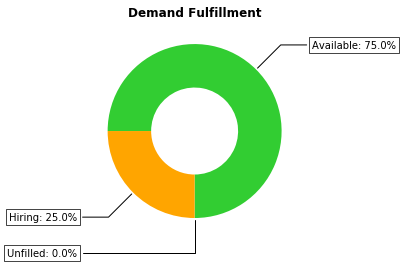

In [25]:
data = [filled_demand_internal, filled_demand_hired, unfilled_demand]
names = ["Available", "Hiring", "Unfilled"]
colors = ["Limegreen", "Orange", "Orangered"]
plot_donut_chart(data, names, colors, "Demand Fulfillment")

### Resources Utilization KPIs

**Resources utilization metric**

(Total resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} + \sum_{j \; \in \; jobs} h_{j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**Internal resources utilization**

(Total internal resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } assign_{r,\; j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**Hired resources utilization**

(Total hired resources allocated to fill jobs demand) / (total  resources' capacity available) :
$$
\frac{\sum_{j \; \in \; jobs} h_{j} }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

**idle utilization metric**

(Total idle resources (internal and hired)) / (total  resources' capacity available) :
$$
\frac{\sum_{r \; \in \; resources} idle_{r} + \sum_{j \; \in \; jobs} (nh_{j} - h_{j}) }{\sum_{r \; \in \; resources } CAP_{r} + \sum_{j \; \in \; jobs} nh_{j}}
$$

In [26]:
# Compute Resource Utlization metrics

# Compute total resource capacity available
resources_capacity = 0
for r in resources:
    resources_capacity = resources_capacity + capacity[r] 


for j in jobs:
    resources_capacity = resources_capacity + nh[j].x

print('Total resource capacity available: ',"%.2f" % resources_capacity, 'FTE')

# Compute internal resource utilization
internal_utilization = 0
for [r, j] in arcs:
    if (abs(assign[r, j].x) > 1e-6):
        internal_utilization = internal_utilization + assign[r, j].x

internal_utilization = 100*internal_utilization/resources_capacity       
print('Internal resource utlization: ',"%.2f" % internal_utilization, '%')

# Compute hired resource utilization
hired_utilization = 0
for j in jobs:
    if (abs(h[j].x) > 1e-6):
        hired_utilization = hired_utilization + h[j].x

hired_utilization = 100*hired_utilization/resources_capacity        
print('Hired resource utlization: ',"%.2f" % hired_utilization, '%')

# Compute total resource utilization
resources_utilization = internal_utilization + hired_utilization 
print('Total resource utilization: ', "%.2f" % resources_utilization, '%')

# Compute unfilled demand metric
idle_utilization = 0
for r in resources:
    if (abs(assign[r, j].x) > 1e-6):
        idle_utilization = idle_utilization + idle[r].x
        
for j in jobs:
    if (abs(h[j].x) > 1e-6):
        idle_utilization = idle_utilization + (nh[j].x - h[j].x ) 

idle_utilization = 100*idle_utilization/resources_capacity        
print('Idle utilization metric: ', "%.2f" % idle_utilization, '%')

Total resource capacity available:  5.00 FTE
Internal resource utlization:  60.00 %
Hired resource utlization:  20.00 %
Total resource utilization:  80.00 %
Idle utilization metric:  20.00 %


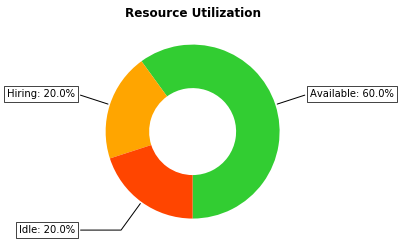

In [27]:
data = [internal_utilization, hired_utilization, idle_utilization]
names = ["Available", "Hiring", "Idle"]
colors = ["Limegreen", "Orange", "Orangered"]
plot_donut_chart(data, names, colors, "Resource Utilization")

### Resources Matching Quality KPIs

**Resources matching quality**

(Total matching score of assignment) / (total job requirements) :
$$
\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } score_{r,\;j}assign_{r,\; j} }{|jobs|}
$$

**Resources matching deficiency**

Degree (%) to which resources allocated to fill jobs demand do not satisfy job requirements:

$$
1-\frac{\sum_{j \; \in \; jobs} \sum_{r \; \in \; resources } score_{r,\;j}assign_{r,\; j} }{|jobs|}
$$

In [28]:
# Compute Resource matching quality
matching_quality = 0
for [r, j] in arcs:
    if (abs(assign[r, j].x) > 1e-6):
        matching_quality = (matching_quality + scores[r,j]*assign[r, j].x)

matching_quality = matching_quality/len(jobs)        
print('Matching quality metric: ', "%.2f" % matching_quality, '%')

# Compute matching deficiency
matching_deficiency = 100 - matching_quality  
print('Matching deficiency metric: ', "%.2f" % matching_deficiency, '%')

Matching quality metric:  41.20 %
Matching deficiency metric:  58.80 %


### Hiring budget KPIs

**Budget consumption metric**

(Total cost of hiring) / (Budget available) :
$$
\frac{\sum_{j \in jobs} cst_{j}*nh_{j} }{B}
$$

**Remaining budget metric**


(Budget available - Total cost of hiring) / (Budget available) :

$$
1-\frac{\sum_{j \in jobs} cst_{j}*nh_{j} }{B}
$$


In [29]:
# Compute hiring budget metrics 

budget_consumption = 0
for j in jobs:
    budget_consumption = budget_consumption + Hcst[j]*nh[j].x
    
budget_consumption = 100*budget_consumption/B
print('Budget consumption metric: ',"%.2f" % budget_consumption, '%')

remaining_budget = 100 - budget_consumption
print('Remaining budget metric: ', "%.2f" % remaining_budget,'%' )

Budget consumption metric:  83.33 %
Remaining budget metric:  16.67 %


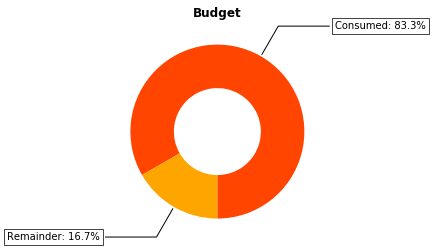

In [30]:
data = [budget_consumption, remaining_budget]
names = ["Consumed", "Remainder"]
colors = ["Orangered", "Orange"]
plot_donut_chart(data, names, colors, "Budget")

Copyright &copy; 2019 Gurobi Optimization, LLC